In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


In [12]:
#load data
data = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
data

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [13]:
#Summarize data using pandas_profiling library
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
from sklearn.preprocessing import StandardScaler

#we scale all non-binary features to improve model performance
standard_scaler = StandardScaler()
columns_to_feature_scale = ["credit_score", "balance", "estimated_salary", "tenure", "products_number"]

data[columns_to_feature_scale] = standard_scaler.fit_transform(data[columns_to_feature_scale])

#show top 5 rows
data.head()

customer_id  credit_score country  gender  age    tenure   balance  \
0     15634602     -0.326221  France  Female   42 -1.041760 -1.225848   
1     15647311     -0.440036   Spain  Female   41 -1.387538  0.117350   
2     15619304     -1.536794  France  Female   42  1.032908  1.333053   
3     15701354      0.501521  France  Female   39 -1.387538 -1.225848   
4     15737888      2.063884   Spain  Female   43 -1.041760  0.785728   

   products_number  credit_card  active_member  estimated_salary  churn  
0        -0.911583            1              1          0.021886      1  
1        -0.911583            0              1          0.216534      0  
2         2.527057            1              0          0.240687      1  
3         0.807737            0              0         -0.108918      0  
4        -0.911583            1              1         -0.365276      0

In [15]:
#convert categorical variables to 0/1 binary classifications
data = pd.get_dummies(data, columns = ['country', 'gender'], drop_first=True)

#show top 5 rows
data.head()

customer_id  credit_score  age    tenure   balance  products_number  \
0     15634602     -0.326221   42 -1.041760 -1.225848        -0.911583   
1     15647311     -0.440036   41 -1.387538  0.117350        -0.911583   
2     15619304     -1.536794   42  1.032908  1.333053         2.527057   
3     15701354      0.501521   39 -1.387538 -1.225848         0.807737   
4     15737888      2.063884   43 -1.041760  0.785728        -0.911583   

   credit_card  active_member  estimated_salary  churn  country_Germany  \
0            1              1          0.021886      1            False   
1            0              1          0.216534      0            False   
2            1              0          0.240687      1            False   
3            0              0         -0.108918      0            False   
4            1              1         -0.365276      0            False   

   country_Spain  gender_Male  
0          False        False  
1           True        False  
2          False        False  
3          False        False  
4           True        False

In [143]:
#now we create our feature variable X and target variable Y
y = data["churn"]
X = data.drop(["churn", "customer_id"], axis=1)

#split into test set and training set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

#imports we'll need
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#fit logistic regression model
log_model = LogisticRegression(random_state=50, max_iter=500, C=0.12, solver='lbfgs')
log_model.fit(X_train, y_train)

pred = log_model.predict(X_test)

log_model_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)
print(log_model_accuracy)

In [122]:
#fit support vector machine model
svc_model = SVC(kernel='linear', random_state=50, probability=True)
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

from sklearn.metrics import f1_score
svc_f1_score = round(metrics.f1_score(y_test, svc_pred) * 100, 2)
print(svc_f1_score)

57.62


In [118]:
#fit k nearest neighbours model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 indicates Euclidean distance
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

from sklearn.metrics import f1_score
knn_f1_score = round(metrics.f1_score(y_test, knn_pred) * 100, 2)
print(knn_f1_score)

48.12


In [119]:
#fit decision tree model
dt_model = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dt_model.fit(X_train, y_train) 
  
dt_pred = dt_model.predict(X_test)

dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

from sklearn.metrics import f1_score
dt_f1_score = round(metrics.f1_score(y_test, dt_pred) * 100, 2)
print(dt_f1_score)

50.0


In [106]:
#fit random forest classification model
#adding a balanced class weight slightly improved performance (accuracy e.g. went from 95.0 to 95.3) because our dataset has more non-churn customers than churn customers
#lowering max depth from 15 to 10 caused a massive increase in churn recall from 0.44 to 0.64 (percentage of churning customers correctly identified)
rf_model = RandomForestClassifier(n_estimators = 85, min_samples_leaf = 3, criterion = 'entropy', max_depth = 13, random_state = 0, class_weight='balanced')
rf_model.fit(X_train, y_train) 
  
rf_pred = rf_model.predict(X_test)

rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

from sklearn.metrics import f1_score
rf_f1_score = round(metrics.f1_score(y_test, rf_pred) * 100, 2)
print(rf_f1_score)

61.36


In [107]:
#We compare accuracies of the models
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'Score': [log_model_accuracy, svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy]})
model_comparison = model_comparison.sort_values(by='Score', ascending=False)
model_comparison = model_comparison.set_index('Score')
model_comparison.reset_index()


Score                   Model
0  84.47           Random Forest
1  82.10      K-Nearest Neighbor
2  81.77     Logistic Regression
3  80.03  Support Vector Machine
4  78.40           Decision Tree

Results are:
Random Forest 85.00
K-Nearest Neighbors 82.03
Logistic Regression 81.33
Support Vector Machine 81.33
Decision Tree 77.27

In [108]:
#generate confusion matrix for random forest, since it's the most accurate model
from sklearn.metrics import confusion_matrix
confusion_matrix_random_forest = confusion_matrix(y_test, rf_pred)
confusion_matrix_random_forest

array([[2164,  237],
       [ 229,  370]])

In [109]:
from sklearn.metrics import f1_score
rf_f1_score = round(metrics.f1_score(y_test, rf_pred) * 100, 2)
print(rf_f1_score)

61.36


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred, target_names=['No churn','Churn']))

              precision    recall  f1-score   support

    No churn       0.90      0.90      0.90      2401
       Churn       0.61      0.62      0.61       599

    accuracy                           0.84      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.85      0.84      0.85      3000



In [209]:
#here we test if combining the random forest with an xgbclassifier improves results. Unfortunately, it performs basically the same - a tiny bit worse to be exact.
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=85, learning_rate=0.1, max_depth=1, subsample=0.4, min_child_weight=30, colsample_bytree=0.4)
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')
voting_model.fit(X_train, y_train)

xgb_pred = voting_model.predict(X_test)

xgb_accuracy = round(metrics.accuracy_score(y_test, xgb_pred) * 100, 2)

from sklearn.metrics import f1_score
xgb_f1_score = round(metrics.f1_score(y_test, xgb_pred) * 100, 2)
print(xgb_f1_score)

#generate confusion matrix for xgb
from sklearn.metrics import confusion_matrix
confusion_matrix_xgb = confusion_matrix(y_test, xgb_pred)
confusion_matrix_xgb

from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_pred, target_names=['No churn','Churn']))

61.39
              precision    recall  f1-score   support

    No churn       0.90      0.91      0.91      2401
       Churn       0.63      0.60      0.61       599

    accuracy                           0.85      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.85      0.85      0.85      3000



In [86]:
#predict probability of churn for all customers
data['churn_probability'] = rf_model.predict_proba(data[X_test.columns])[:,1]
data

customer_id  credit_score  age    tenure   balance  products_number  \
0        15634602     -0.326221   42 -1.041760 -1.225848        -0.911583   
1        15647311     -0.440036   41 -1.387538  0.117350        -0.911583   
2        15619304     -1.536794   42  1.032908  1.333053         2.527057   
3        15701354      0.501521   39 -1.387538 -1.225848         0.807737   
4        15737888      2.063884   43 -1.041760  0.785728        -0.911583   
...           ...           ...  ...       ...       ...              ...   
9995     15606229      1.246488   39 -0.004426 -1.225848         0.807737   
9996     15569892     -1.391939   35  1.724464 -0.306379        -0.911583   
9997     15584532      0.604988   36  0.687130 -1.225848        -0.911583   
9998     15682355      1.256835   42 -0.695982 -0.022608         0.807737   
9999     15628319      1.463771   28 -0.350204  0.859965        -0.911583   

      credit_card  active_member  estimated_salary  churn  country_Germany  \
0               1              1          0.021886      1            False   
1               0              1          0.216534      0            False   
2               1              0          0.240687      1            False   
3               0              0         -0.108918      0            False   
4               1              1         -0.365276      0            False   
...           ...            ...               ...    ...              ...   
9995            1              0         -0.066419      0            False   
9996            1              1          0.027988      0            False   
9997            0              1         -1.008643      1            False   
9998            1              0         -0.125231      1             True   
9999            1              0         -1.076370      0            False   

      country_Spain  gender_Male  churn_probability  
0             False        False           0.538411  
1              True        False           0.301382  
2             False        False           0.914476  
3             False        False           0.268503  
4              True        False           0.256321  
...             ...          ...                ...  
9995          False         True           0.031113  
9996          False         True           0.092204  
9997          False        False           0.552291  
9998          False         True           0.555670  
9999          False        False           0.210013  

[10000 rows x 14 columns]

In [29]:
#dataset containing only customer ID and churn probability
data[['customer_id','churn_probability']].head()

customer_id  churn_probability
0     15634602           0.590276
1     15647311           0.439760
2     15619304           0.931839
3     15701354           0.226701
4     15737888           0.396881

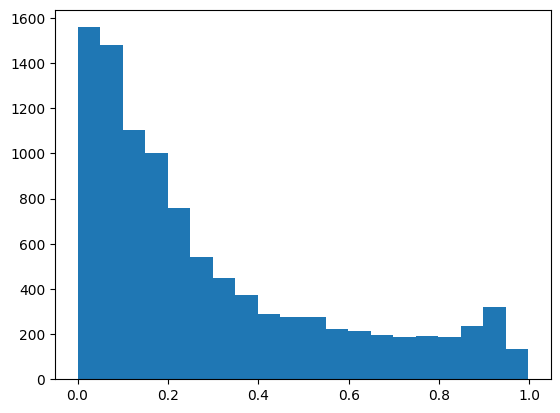

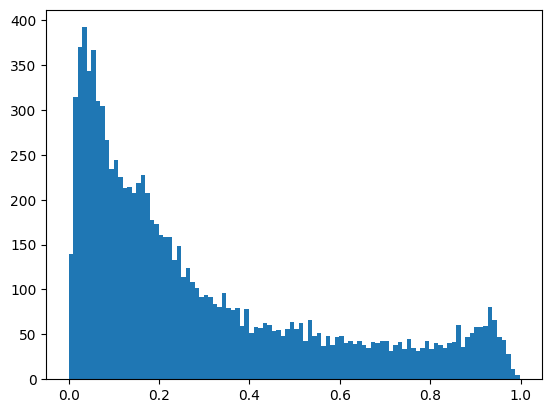

In [87]:
#create histograms of churn probability
plt.hist(data['churn_probability'], bins=20)
plt.show()

plt.hist(data['churn_probability'], bins=100)
plt.show()

In [32]:
#Summarize data again using pandas_profiling library - this time with predicted churn probability
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]